Ideas for what can be done:
Show the most popular drugs for doctors in the highest percentile
Show a percentile break down of either average cost per prescription or the percent above. 

This is the website data can be found at - https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Physician-and-Other-Supplier.html

In [292]:

import os
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt
#print(os.listdir())
df = pd.read_csv('medicare-physician-and-other-supplier-national-provider-identifier-npi-aggregate-report-calendar-year-2016.csv', low_memory = False)
for name in enumerate(df.columns):
    print(name)
#for name in enumerate(df.columns):
    #print(name)
df2  = df.iloc[:,15:]
for name in enumerate(df2.columns):
    print(name)


(0, 'National Provider Identifier')
(1, 'Last Name/Organization Name of the Provider')
(2, 'First Name of the Provider')
(3, 'Middle Initial of the Provider')
(4, 'Credentials of the Provider')
(5, 'Gender of the Provider')
(6, 'Entity Type of the Provider')
(7, 'Street Address 1 of the Provider')
(8, 'Street Address 2 of the Provider')
(9, 'City of the Provider')
(10, 'Zip Code of the Provider')
(11, 'State Code of the Provider')
(12, 'Country Code of the Provider')
(13, 'Provider Type of the Provider')
(14, 'Medicare Participation Indicator')
(15, 'Number of HCPCS')
(16, 'Number of Services')
(17, 'Number of Medicare Beneficiaries')
(18, 'Total Submitted Charge Amount')
(19, 'Total Medicare Allowed Amount')
(20, 'Total Medicare Payment Amount')
(21, 'Total Medicare Standardized Payment Amount')
(22, 'Drug Suppress Indicator')
(23, 'Number of HCPCS Associated With Drug Services')
(24, 'Number of Drug Services')
(25, 'Number of Medicare Beneficiaries With Drug Services')
(26, 'Total Dr

In [293]:
df.columns

Index(['National Provider Identifier',
       'Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider',
       'Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'Street Address 1 of the Provider',
       'Street Address 2 of the Provider', 'City of the Provider',
       'Zip Code of the Provider', 'State Code of the Provider',
       'Country Code of the Provider', 'Provider Type of the Provider',
       'Medicare Participation Indicator', 'Number of HCPCS',
       'Number of Services', 'Number of Medicare Beneficiaries',
       'Total Submitted Charge Amount', 'Total Medicare Allowed Amount',
       'Total Medicare Payment Amount',
       'Total Medicare Standardized Payment Amount', 'Drug Suppress Indicator',
       'Number of HCPCS Associated With Drug Services',
       'Number of Drug Services',
       'Number of Medicare Beneficiaries With Drug Services',
       'Total Drug Sub

In [294]:
df2['National Provider Identifier'] = df['National Provider Identifier']
df2['Gender of the Provider'] = df['Gender of the Provider']
df2['cost_per_patient'] = df2['Total Medicare Payment Amount']/df2['Number of Medicare Beneficiaries']

# Wrangling Drug Information
In the cells below I import the medicare drug dataframe. As the dataframe includes specific information for each drug, I combine all rows for each doctor into one that includes the total cost of all drugs written and total number of 30 day prescriptions written. I do this using pandas groupy and sum function. Once this is completed the dataframe is merged with the dataframe of the patient demographic information for each physician. 

In [295]:
import pandas as pd
dr_costs = pd.read_pickle('df_dcost')
dr_costs.columns

Index(['npi', 'specialty_description', 'drug_name', 'generic_name',
       'total_30_day_fill_count', 'total_drug_cost'],
      dtype='object')

In [296]:
dr_costs.columns = ['National Provider Identifier', 'specialty_description', 'drug_name', 'generic_name',
       'total_30_day_fill_count', 'total_drug_cost']

In [297]:
#dr.costs_3_times = dr_costs[dr_costs['National Provider Identifier']]

In [298]:
dr_cost_num = dr_costs.drop(['drug_name', 'generic_name'], axis = 1)
dr_dict = dr_cost_num.drop('specialty_description', axis = 1)
drug_count = dr_dict.groupby('National Provider Identifier')
drug_sum = drug_count.sum()
drug_sum

,total_30_day_fill_count,total_drug_cost
National Provider Identifier,,
1003000126,319.0,20655.60
1003000142,1690.8,120865.38
1003000167,32.0,134.76
1003000282,30.0,328.04
1003000407,1742.2,86421.07
1003000423,52.0,3104.23
1003000480,17.0,3286.74
1003000522,10084.4,208483.89
1003000530,9895.3,269677.82


In [299]:

dr_spec = dr_costs.drop(['total_drug_cost', 'total_30_day_fill_count'], axis = 1)

In [300]:
print(dr_spec[:5])
dr_spec = dr_spec.drop_duplicates()
print(dr_spec.shape)

   National Provider Identifier specialty_description             drug_name  \
0                    1003000126     Internal Medicine  ATORVASTATIN CALCIUM   
1                    1003000126     Internal Medicine     CIPROFLOXACIN HCL   
2                    1003000126     Internal Medicine   DOXYCYCLINE HYCLATE   
3                    1003000126     Internal Medicine               ELIQUIS   
4                    1003000126     Internal Medicine            FUROSEMIDE   

           generic_name  
0  ATORVASTATIN CALCIUM  
1     CIPROFLOXACIN HCL  
2   DOXYCYCLINE HYCLATE  
3              APIXABAN  
4            FUROSEMIDE  
(24964300, 4)


In [301]:
print(drug_sum.columns)
print(drug_sum.head())
drug_sum = drug_sum.merge(dr_spec, how = 'inner', on = 'National Provider Identifier')

Index(['total_30_day_fill_count', 'total_drug_cost'], dtype='object')
                              total_30_day_fill_count  total_drug_cost
National Provider Identifier                                          
1003000126                                      319.0         20655.60
1003000142                                     1690.8        120865.38
1003000167                                       32.0           134.76
1003000282                                       30.0           328.04
1003000407                                     1742.2         86421.07


In [302]:
drug_sum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24964300 entries, 0 to 24964299
Data columns (total 6 columns):
National Provider Identifier    int64
total_30_day_fill_count         float64
total_drug_cost                 float64
specialty_description           object
drug_name                       object
generic_name                    object
dtypes: float64(2), int64(1), object(3)
memory usage: 1.3+ GB


In [303]:
import numpy as np
drug_sum['National Provider Identifier'] = drug_sum['National Provider Identifier'].astype(np.int64)
drug_sum.head()


,National Provider Identifier,total_30_day_fill_count,total_drug_cost,specialty_description,drug_name,generic_name
0,1003000126,319.0,20655.6,Internal Medicine,ATORVASTATIN CALCIUM,ATORVASTATIN CALCIUM
1,1003000126,319.0,20655.6,Internal Medicine,CIPROFLOXACIN HCL,CIPROFLOXACIN HCL
2,1003000126,319.0,20655.6,Internal Medicine,DOXYCYCLINE HYCLATE,DOXYCYCLINE HYCLATE
3,1003000126,319.0,20655.6,Internal Medicine,ELIQUIS,APIXABAN
4,1003000126,319.0,20655.6,Internal Medicine,FUROSEMIDE,FUROSEMIDE


# Merge both dataframes
Below we merge the dataframe of the cumulative drug prescription info for each doctor and the dataframe of demographic information of doctors' patient populations

In [307]:

df9 = drug_sum.merge(df2, how = 'inner', on = 'National Provider Identifier')
df9.head()

MemoryError: 

# In the below cells I create a list of the ten most common medical specialties

In [308]:
from collections import Counter
V_count = Counter(df9.specialty_description).most_common(10)
index = 1
d = {} 
for name, count in V_count:
    d[name] = index
    index += 1
print(d)    
        
        

{'Internal Medicine': 1, 'Family Practice': 2, 'Nurse Practitioner': 3, 'Physician Assistant': 4, 'Emergency Medicine': 5, 'Obstetrics & Gynecology': 6, 'Psychiatry': 7, 'Cardiovascular Disease (Cardiology)': 8, 'Optometry': 9, 'Orthopedic Surgery': 10}


# Copies of merged DataFrame in entirety
In the cell below I create copies fo the newly merged dataframe. I do this because I will be making modifications to the DataFrame to prepare it to be explored with Scikit Learn's algorithm's. However I want to be able to access the original dataframe so that I can use data exploration and plot visuals with all of the original data. 

In [383]:
spec_df = df9.copy()
spec_unfiltered_df = df9.copy()
print(type(spec_unfiltered_df))

<class 'pandas.core.frame.DataFrame'>


# Eliminating Features and Filtering out Rows
In the cells below I eliminate features which are missing to much information. Essentially these features have to many rows without real values and which have nan values instead. In addition I filter  out rows which have less than 44 features with real values that are not nan. There are a total of 52 features we are using. In essences rows which are missing over 17% of the used features are being removed from the dataset. 

The rows that we do keep but that have nan values are dealt with by the fillna function. We fill the nan values with the median values of their respective columns. 

In [385]:

df9 = df9.drop(['Percent (%) of Beneficiaries Identified With Schizophrenia / Other Psychotic Disorders','Number of Black or African American Beneficiaries','Number of Asian Pacific Islander Beneficiaries','Number of Hispanic Beneficiaries','Number of American Indian/Alaska Native Beneficiaries','Number of Beneficiaries With Race Not Elsewhere Classified','Medical Suppress Indicator','Drug Suppress Indicator'], axis = 1)
#df46 = df9.dropna(thresh = 47 )
#df41 = df9.dropna(thresh = 41 )
df44 = df9.dropna(thresh = 44 )
df44_fill = df44.fillna(df44.median())

In [386]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import functools


# Modifying Categorical Data
In the cell below there is a dictionary giving numerical values to keys representing gender. Using this the gender information is remapped to bivariate numerical representations. This is important because the machine learning algorithm's only with numerical data. 

Similarly in the cell directly below the one described I filter the dataframe to include the ten specialties with the most doctors who prescribed over 3,000 prescription for the year. I then created Dummy Variables for each specialty. 

In [387]:
df_fill = df44_fill

genderdict = {'M':1, 'F':0}
df_fill['Gender of the Provider'] = df_fill['Gender of the Provider'].map(genderdict)
df_fill.shape

(200692, 53)

In [388]:

from collections import Counter
spec_df = df_fill[df_fill['total_30_day_fill_count']>=3000]


V_count = Counter(spec_df.specialty_description).most_common(10)
spec_list = []
for object in V_count:
    spec_list.append(object[0])

top_spec = df_fill[df_fill.specialty_description.isin(spec_list)]
dummy_df = pd.get_dummies(top_spec['specialty_description'])
df_fill = pd.concat([top_spec,dummy_df], axis = 1)

In [389]:
df_fill.columns

Index(['National Provider Identifier', 'total_30_day_fill_count',
       'total_drug_cost', 'specialty_description', 'Number of HCPCS',
       'Number of Services', 'Number of Medicare Beneficiaries',
       'Total Submitted Charge Amount', 'Total Medicare Allowed Amount',
       'Total Medicare Payment Amount',
       'Total Medicare Standardized Payment Amount',
       'Number of HCPCS Associated With Drug Services',
       'Number of Drug Services',
       'Number of Medicare Beneficiaries With Drug Services',
       'Total Drug Submitted Charge Amount',
       'Total Drug Medicare Allowed Amount',
       'Total Drug Medicare Payment Amount',
       'Total Drug Medicare Standardized Payment Amount',
       'Number of HCPCS Associated With Medical Services',
       'Number of Medical Services',
       'Number of Medicare Beneficiaries With Medical Services',
       'Total Medical Submitted Charge Amount',
       'Total Medical Medicare Allowed Amount',
       'Total Medical Medicare 

In [410]:
drug_avg = df_fill.loc[:,['specialty_description','total_drug_cost']]
#spec_df =  df9.copy()
#spec_unfiltered_df = df9.copy()
#rint(type(spec_unfiltered_df))
drug_avg = drug_avg.groupby(by ='specialty_description').median()
print(drug_avg)


                                     total_drug_cost
specialty_description                               
Cardiovascular Disease (Cardiology)       206773.435
Endocrinology                             649742.900
Family Practice                           212775.960
Internal Medicine                         289301.060
Neurology                                 500899.610
Nurse Practitioner                        106246.560
Ophthalmology                             173928.825
Physician Assistant                       102640.195
Psychiatry                                216093.820
Urology                                   139895.190


In [391]:

drug_avg = drug_avg.round()
drug_avg_dict = drug_avg.to_dict()
print(drug_avg_dict)
#drug_avg = drug_avg.reset_index()

print(df_fill.describe())


{'total_drug_cost': {'Cardiovascular Disease (Cardiology)': 289283.0, 'Endocrinology': 822308.0, 'Family Practice': 308140.0, 'Internal Medicine': 422990.0, 'Neurology': 833908.0, 'Nurse Practitioner': 201047.0, 'Ophthalmology': 240080.0, 'Physician Assistant': 187239.0, 'Psychiatry': 329565.0, 'Urology': 188719.0}}
       National Provider Identifier  total_30_day_fill_count  total_drug_cost  \
count                  1.619140e+05            161914.000000     1.619140e+05   
mean                   1.500186e+09              7818.602021     3.399224e+05   
std                    2.877199e+08              7517.876766     4.693744e+05   
min                    1.003000e+09              1000.100000     4.606750e+03   
25%                    1.245667e+09              2647.900000     9.756633e+04   
50%                    1.508046e+09              5364.600000     2.112788e+05   
75%                    1.750313e+09             10518.600000     4.165485e+05   
max                    1.993000e+0

In [392]:
nested_dict = drug_avg['total_drug_cost']
print(nested_dict)
nested_dict = nested_dict.to_dict()
#nested = drug_avg['total_drug_cost']
#nested = nested.reset_index()
#nested_dict = drug_avg.to_dict()
#k = avg_dict.values()
print(nested_dict)
print(type(nested_dict))
df_fill['specialty_description_vector'] = df_fill['specialty_description'].map(nested_dict)

specialty_description
Cardiovascular Disease (Cardiology)    289283.0
Endocrinology                          822308.0
Family Practice                        308140.0
Internal Medicine                      422990.0
Neurology                              833908.0
Nurse Practitioner                     201047.0
Ophthalmology                          240080.0
Physician Assistant                    187239.0
Psychiatry                             329565.0
Urology                                188719.0
Name: total_drug_cost, dtype: float64
{'Cardiovascular Disease (Cardiology)': 289283.0, 'Endocrinology': 822308.0, 'Family Practice': 308140.0, 'Internal Medicine': 422990.0, 'Neurology': 833908.0, 'Nurse Practitioner': 201047.0, 'Ophthalmology': 240080.0, 'Physician Assistant': 187239.0, 'Psychiatry': 329565.0, 'Urology': 188719.0}
<class 'dict'>


In [393]:
df_fill.head()

,National Provider Identifier,total_30_day_fill_count,total_drug_cost,specialty_description,Number of HCPCS,Number of Services,Number of Medicare Beneficiaries,Total Submitted Charge Amount,Total Medicare Allowed Amount,Total Medicare Payment Amount,...,Endocrinology,Family Practice,Internal Medicine,Neurology,Nurse Practitioner,Ophthalmology,Physician Assistant,Psychiatry,Urology,specialty_description_vector
2,1003000407,1742.2,86421.07,Family Practice,31,1637.0,401,260033.00,179134.36,136143.38,...,0,1,0,0,0,0,0,0,0,308140.0
5,1003000522,10084.4,208483.89,Family Practice,55,1952.0,417,368518.56,139319.81,106581.66,...,0,1,0,0,0,0,0,0,0,308140.0
6,1003000530,9895.3,269677.82,Internal Medicine,25,1319.0,334,185183.00,124717.40,89429.84,...,0,0,1,0,0,0,0,0,0,422990.0
9,1003000902,9005.6,204088.52,Family Practice,35,916.0,258,106047.00,59687.40,40810.00,...,0,1,0,0,0,0,0,0,0,308140.0
10,1003000936,3061.0,137785.22,Internal Medicine,68,4670.0,1374,565333.00,278921.17,208615.23,...,0,0,1,0,0,0,0,0,0,422990.0


In [394]:
all_med = df_fill
all_med = all_med.drop('specialty_description', axis = 1)
all_med.shape

(161914, 63)

In [395]:
all_med = all_med.astype(np.float64)
all_med = all_med.fillna(all_med.median())
all_med.info()
all_med = all_med[all_med['total_30_day_fill_count']>=3000]
all_med.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161914 entries, 2 to 622701
Data columns (total 63 columns):
National Provider Identifier                                                          161914 non-null float64
total_30_day_fill_count                                                               161914 non-null float64
total_drug_cost                                                                       161914 non-null float64
Number of HCPCS                                                                       161914 non-null float64
Number of Services                                                                    161914 non-null float64
Number of Medicare Beneficiaries                                                      161914 non-null float64
Total Submitted Charge Amount                                                         161914 non-null float64
Total Medicare Allowed Amount                                                         161914 non-null float64
Total Med

(114825, 63)

In [396]:
wall_med = all_med.sample(frac=0.2, replace=False, axis = 0)
#all_med = all_med.drop(['specialty_description'], axis = 1)


In [397]:
wall_med.shape

(22965, 63)

In [398]:
from sklearn.ensemble import RandomForestRegressor

In [399]:
X = wall_med.drop('total_drug_cost', axis = 1)
y = wall_med.total_drug_cost


In [400]:
max_features = [30, 32]
max_depth = [25, 27] 

parameters = {'max_depth': max_depth, 'max_features' : max_features}

rf = RandomForestRegressor(n_estimators = 150)
clf = GridSearchCV(rf, param_grid = parameters, cv=3 )
clf.fit(X, y)
print(clf.best_params_)
b_estimator = clf.best_estimator_
print(b_estimator)

KeyboardInterrupt: 

In [401]:
X = all_med.drop('total_drug_cost', axis = 1)
X = X_initial.drop('National Provider Identifier', axis = 1)
y = all_med.total_drug_cost
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20)


In [411]:
rf1 = RandomForestRegressor( n_estimators = 400, max_features = 30, max_depth = 25)
X_test.head()

,level_0,index,original_index,total_30_day_fill_count,Number of HCPCS,Number of Services,Number of Medicare Beneficiaries,Total Submitted Charge Amount,Total Medicare Allowed Amount,Total Medicare Payment Amount,...,Endocrinology,Family Practice,Internal Medicine,Neurology,Nurse Practitioner,Ophthalmology,Physician Assistant,Psychiatry,Urology,specialty_description_vector
2914,2914,2914,15012,8243.3,21.0,906.0,297.0,262925.00,83561.11,61231.37,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,268416.0
41561,41561,41561,225230,25824.1,92.0,10813.0,931.0,1206663.00,458733.56,334901.73,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,268416.0
47172,47172,47172,255879,8819.2,10.0,1214.0,621.0,228614.00,154149.89,105207.01,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,696709.0
4443,4443,4443,23441,8523.7,8.0,123.0,76.0,11669.31,6409.84,4981.61,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,100600.0
42240,42240,42240,228608,3933.5,59.0,875.0,149.0,96728.00,34577.86,23400.33,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,268416.0


In [ ]:
rf1.fit(X_train, y_train)
rf1_y_pred = rf.predict(X_test)
rf1_SCORE = rf.score(X_test, y_test)
print(rf1_SCORE)

In [402]:
rf = RandomForestRegressor( n_estimators = 200, max_features = 30, max_depth = 25)
X_test.head()

,level_0,index,original_index,total_30_day_fill_count,Number of HCPCS,Number of Services,Number of Medicare Beneficiaries,Total Submitted Charge Amount,Total Medicare Allowed Amount,Total Medicare Payment Amount,...,Endocrinology,Family Practice,Internal Medicine,Neurology,Nurse Practitioner,Ophthalmology,Physician Assistant,Psychiatry,Urology,specialty_description_vector
2914,2914,2914,15012,8243.3,21.0,906.0,297.0,262925.00,83561.11,61231.37,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,268416.0
41561,41561,41561,225230,25824.1,92.0,10813.0,931.0,1206663.00,458733.56,334901.73,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,268416.0
47172,47172,47172,255879,8819.2,10.0,1214.0,621.0,228614.00,154149.89,105207.01,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,696709.0
4443,4443,4443,23441,8523.7,8.0,123.0,76.0,11669.31,6409.84,4981.61,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,100600.0
42240,42240,42240,228608,3933.5,59.0,875.0,149.0,96728.00,34577.86,23400.33,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,268416.0


In [403]:
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_SCORE = rf.score(X_test, y_test)
print(rf_SCORE)

0.6480155783077288


In [404]:
y_test.head()

15012      430927.18
225230    2523376.63
255879     692735.23
23441      480729.09
228608     162186.62
Name: total_drug_cost, dtype: float64

In [405]:
print(rf_y_pred)

[ 314281.54104075 1165538.70348395  898087.6092625  ...  549792.80992059
   89652.98133035  533696.14051854]


In [406]:
print(y_test.shape)
type(rf_y_pred.shape)

(22965,)


tuple

In [407]:
print(f'dif{rf_y_pred - y_test}')

dif15012    -1.166456e+05
225230   -1.357838e+06
255879    2.053524e+05
23441     6.291833e+04
228608   -5.995526e+04
372115   -2.109581e+04
12764     5.354554e+04
51905     5.829571e+04
297057   -8.443653e+04
468059   -2.048697e+04
125440   -1.332914e+05
233229    1.188530e+04
171693    4.892929e+04
237411    8.416252e+04
287790   -1.201820e+04
51295    -5.332415e+03
74390     5.362273e+04
154831    3.493116e+05
251651    1.307448e+05
530946    2.157670e+04
14111    -5.698248e+04
408090    5.988832e+04
416940   -8.908649e+03
257600    9.886096e+04
146699   -5.316728e+04
359509    7.686235e+04
573284    5.602267e+04
399775   -1.766860e+04
162608    8.345595e+04
8091     -2.680778e+04
              ...     
449061   -1.216400e+04
15252    -8.514460e+02
432526    3.356592e+04
88125    -7.764563e+03
233545    4.512062e+04
476807   -5.216671e+04
455402    5.098219e+04
478331    4.129271e+04
618793    1.251052e+05
502284    1.064932e+05
305085   -9.180383e+04
260131    2.474502e+05
187652  

In [408]:
from collections import Counter
cnt = Counter()
percent_dif = (rf_y_pred - y_test)/y_test
percent_dif
perc= (percent_dif < index).astype('int')
perc
#under_20_percent_dif = (percent_dif < .20).astype('int')
#print(under_20_percent_dif)

15012     1
225230    1
255879    1
23441     1
228608    1
372115    1
12764     1
51905     1
297057    1
468059    1
125440    1
233229    1
171693    1
237411    1
287790    1
51295     1
74390     1
154831    1
251651    1
530946    1
14111     1
408090    1
416940    1
257600    1
146699    1
359509    1
573284    1
399775    1
162608    1
8091      1
         ..
449061    1
15252     1
432526    1
88125     1
233545    1
476807    1
455402    1
478331    1
618793    1
502284    1
305085    1
260131    1
187652    1
303179    1
312286    1
214248    1
351506    1
95755     1
140834    1
163397    1
411776    1
314077    1
426779    1
2988      1
569973    1
405578    1
585459    1
379158    1
123493    1
381830    1
Name: total_drug_cost, Length: 22965, dtype: int32

In [409]:
from collections import Counter
cnt = Counter()

percent_dif = (rf_y_pred - y_test)/y_test

under_100_percent_dif = (percent_dif < 1).astype('int')
print(f' Under 100 percent:{under_100_percent_dif.value_counts()}')

index = -20
dict_perc = {}
for percent in range(100):
    cnt[0] = 0
    cnt[1] = 0
    perc =  (percent_dif < index).astype('int')
    for num in perc:
        cnt[num] += 1
    #print(cnt[1])
    #print(cnt[0])
    value = cnt[1]/(cnt[1]+cnt[0])
   
#value = round(value)
    dict_perc[index] = value
    index +=.02
print(dict_perc)
#print(dict_perc)
Prescription_plot = pd.DataFrame.from_dict(dict_perc, orient = 'index')
Prescription_plot = Prescription_plot.reset_index()
Prescription_plot.columns = ['peak_percentage','percentage of physicians below given peak']
Prescription_plot.head()   

    

 Under 100 percent:1    21826
0     1139
Name: total_drug_cost, dtype: int64
{-20: 0.0, -19.98: 0.0, -19.96: 0.0, -19.94: 0.0, -19.92: 0.0, -19.900000000000002: 0.0, -19.880000000000003: 0.0, -19.860000000000003: 0.0, -19.840000000000003: 0.0, -19.820000000000004: 0.0, -19.800000000000004: 0.0, -19.780000000000005: 0.0, -19.760000000000005: 0.0, -19.740000000000006: 0.0, -19.720000000000006: 0.0, -19.700000000000006: 0.0, -19.680000000000007: 0.0, -19.660000000000007: 0.0, -19.640000000000008: 0.0, -19.620000000000008: 0.0, -19.60000000000001: 0.0, -19.58000000000001: 0.0, -19.56000000000001: 0.0, -19.54000000000001: 0.0, -19.52000000000001: 0.0, -19.50000000000001: 0.0, -19.48000000000001: 0.0, -19.46000000000001: 0.0, -19.440000000000012: 0.0, -19.420000000000012: 0.0, -19.400000000000013: 0.0, -19.380000000000013: 0.0, -19.360000000000014: 0.0, -19.340000000000014: 0.0, -19.320000000000014: 0.0, -19.300000000000015: 0.0, -19.280000000000015: 0.0, -19.260000000000016: 0.0, -19.240000

,peak_percentage,percentage of physicians below given peak
0,-20.00,0.0
1,-19.98,0.0
2,-19.96,0.0
3,-19.94,0.0
4,-19.92,0.0


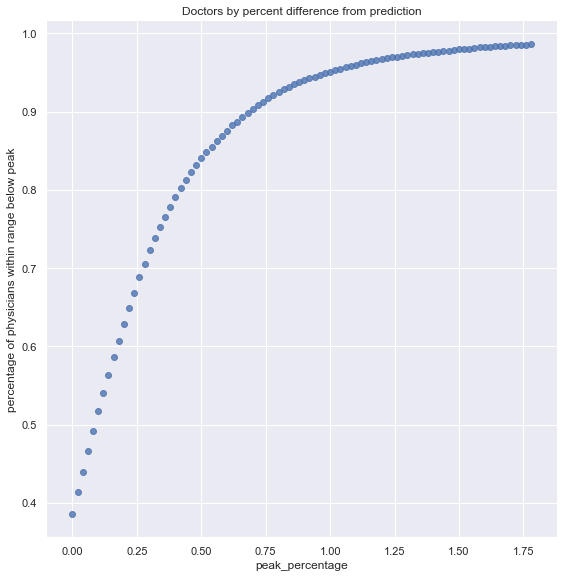

In [371]:
import seaborn as sns

sns.lmplot(x = 'peak_percentage', y ='percentage of physicians within range below peak', data = Prescription_plot, fit_reg = False,  aspect=1, height=8)

plt.title('Doctors by percent difference from prediction')
plt.savefig('doctors by percent difference from prediction.png')


under_20_percent = .627
under_40_percent = .781
Under_50_percent = .832
Under_75_percent = .911
under_100_percent = .948
Under_150_percent = .979
under_200_percent = .989
under_250_percent = .999

In [335]:
percent_dif = (rf_y_pred - y_test)/y_test
percent_dif
under_20_percent_dif = (percent_dif < .20).astype('int')
print(f' Under 20 percent:{under_20_percent_dif.value_counts()}')
under_40_percent_dif= (percent_dif < .4).astype('int')
print(f' Under 40 percent above:{under_40_percent_dif.value_counts()}')
under_60_percent_dif = (percent_dif < .60).astype('int')
print(f' Under 60 percent above:{under_60_percent_dif.value_counts()}')
under_80_percent_dif = (percent_dif < .8).astype('int')
print(f' Under 80 percent:{under_80_percent_dif.value_counts()}')
under_100_percent_dif = (percent_dif < 1).astype('int')
print(f' Under 100 percent:{under_100_percent_dif.value_counts()}')
under_150_percent_dif = (percent_dif > 1.5).astype('int')
print(f' Under 150 percent:{under_150_percent_dif.value_counts()}')
under_200_percent_dif = (percent_dif > 2).astype('int')
print(f' Under 200 percent:{under_200_percent_dif.value_counts()}')
under_500_percent_dif = (percent_dif > 5).astype('int')
print(f' Under 250 percent:{under_500_percent_dif.value_counts()}')

#acc = accuracy_score(y_test, under_20_percent_dif)


 Under 20 percent:1    14451
0     8514
Name: total_drug_cost, dtype: int64
 Under 40 percent above:1    18155
0     4810
Name: total_drug_cost, dtype: int64
 Under 60 percent above:1    20114
0     2851
Name: total_drug_cost, dtype: int64
 Under 80 percent:1    21241
0     1724
Name: total_drug_cost, dtype: int64
 Under 100 percent:1    21845
0     1120
Name: total_drug_cost, dtype: int64
 Under 150 percent:0    22494
1      471
Name: total_drug_cost, dtype: int64
 Under 200 percent:0    22723
1      242
Name: total_drug_cost, dtype: int64
 Under 250 percent:0    22932
1       33
Name: total_drug_cost, dtype: int64


In [336]:
all_med_2 = all_med
rf_y_pred = pd.DataFrame(rf_y_pred)
y_test_df = pd.DataFrame(y_test)
print(type(rf_y_pred))
print(type(y_test_df))
print(y_test_df.shape)
rf_y_pred.shape

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(22965, 1)


(22965, 1)

In [337]:
#df_and_pred = X_initial.merge(y_results, axis =1)
#High_df = df_and_pred[(df_and_pred[percent_dif] => 1.5)]
#Low_df = df_and_pred[(df_and_pred[percent_dif] <= 1.5)]

In [338]:
rf_y_pred.head()
rf_y_pred.index.name = 'index1'
rf_y_pred.head()
y_test_df = y_test_df.reset_index()
y_test_df = y_test_df.astype('float64')

In [339]:
y_test_df.head()

,index,total_drug_cost
0,329639.0,579283.42
1,236912.0,60610.80
2,537406.0,700035.81
3,525601.0,581810.73
4,207619.0,418179.69


In [340]:
type(rf_y_pred)
rf_y_pred.head()

,0
index1,
0,392158.403977
1,112007.689418
2,546094.842430
3,572770.492469
4,337784.398701


In [341]:
#y_test_df = y_test_df.reset_index()
y_test_df.columns = ['original_index', 'total_drug_cost']
y_test_df.index.name = 'index1'


In [342]:
y_combo_df = y_test_df.join(rf_y_pred, on= 'index1')
y_combo_df.columns = ['original_index', 'total_drug_cost', 'predicted_drug_cost']
y_combo_df.head()

,original_index,total_drug_cost,predicted_drug_cost
index1,,,
0,329639.0,579283.42,392158.403977
1,236912.0,60610.80,112007.689418
2,537406.0,700035.81,546094.842430
3,525601.0,581810.73,572770.492469
4,207619.0,418179.69,337784.398701


In [343]:
y_combo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22965 entries, 0 to 22964
Data columns (total 3 columns):
original_index         22965 non-null float64
total_drug_cost        22965 non-null float64
predicted_drug_cost    22965 non-null float64
dtypes: float64(3)
memory usage: 538.3 KB


In [344]:
all_med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114825 entries, 5 to 622701
Data columns (total 63 columns):
National Provider Identifier                                                          114825 non-null float64
total_30_day_fill_count                                                               114825 non-null float64
total_drug_cost                                                                       114825 non-null float64
Number of HCPCS                                                                       114825 non-null float64
Number of Services                                                                    114825 non-null float64
Number of Medicare Beneficiaries                                                      114825 non-null float64
Total Submitted Charge Amount                                                         114825 non-null float64
Total Medicare Allowed Amount                                                         114825 non-null float64
Total Med

In [345]:
y_combo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22965 entries, 0 to 22964
Data columns (total 3 columns):
original_index         22965 non-null float64
total_drug_cost        22965 non-null float64
predicted_drug_cost    22965 non-null float64
dtypes: float64(3)
memory usage: 538.3 KB


In [346]:
X_test.head()
X_test.index.name = 'original_index'
X_initial.head()

,level_0,index,original_index,National Provider Identifier,total_30_day_fill_count,Number of HCPCS,Number of Services,Number of Medicare Beneficiaries,Total Submitted Charge Amount,Total Medicare Allowed Amount,...,Endocrinology,Family Practice,Internal Medicine,Neurology,Nurse Practitioner,Ophthalmology,Physician Assistant,Psychiatry,Urology,specialty_description_vector
0,0,0,5,1.003001e+09,10084.4,55.0,1952.0,417.0,368518.56,139319.81,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247838.0
1,1,1,6,1.003001e+09,9895.3,25.0,1319.0,334.0,185183.00,124717.40,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,268416.0
2,2,2,9,1.003001e+09,9005.6,35.0,916.0,258.0,106047.00,59687.40,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247838.0
3,3,3,10,1.003001e+09,3061.0,68.0,4670.0,1374.0,565333.00,278921.17,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,268416.0
4,4,4,18,1.003002e+09,4713.7,42.0,640.0,145.0,63048.00,42913.01,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247838.0


In [347]:
X_test.reset_index()
X_initial.columns

ValueError: cannot insert original_index, already exists

In [ ]:
X_initial = X_initial.reset_index()
X_initial.columns = ['original_index','National Provider Identifier', 'total_30_day_fill_count',
       'Number of HCPCS', 'Number of Services',
       'Number of Medicare Beneficiaries', 'Total Submitted Charge Amount',
       'Total Medicare Allowed Amount', 'Total Medicare Payment Amount',
       'Total Medicare Standardized Payment Amount',
       'Number of HCPCS Associated With Drug Services',
       'Number of Drug Services',
       'Number of Medicare Beneficiaries With Drug Services',
       'Total Drug Submitted Charge Amount',
       'Total Drug Medicare Allowed Amount',
       'Total Drug Medicare Payment Amount',
       'Total Drug Medicare Standardized Payment Amount',
       'Number of HCPCS Associated With Medical Services',
       'Number of Medical Services',
       'Number of Medicare Beneficiaries With Medical Services',
       'Total Medical Submitted Charge Amount',
       'Total Medical Medicare Allowed Amount',
       'Total Medical Medicare Payment Amount',
       'Total Medical Medicare Standardized Payment Amount',
       'Average Age of Beneficiaries', 'Number of Beneficiaries Age Less 65',
       'Number of Beneficiaries Age 65 to 74',
       'Number of Beneficiaries Age 75 to 84',
       'Number of Beneficiaries Age Greater 84',
       'Number of Female Beneficiaries', 'Number of Male Beneficiaries\t',
       'Number of Non-Hispanic White Beneficiaries\t',
       'Number of Beneficiaries With Medicare Only Entitlement',
       'Number of Beneficiaries With Medicare & Medicaid Entitlement',
       'Percent (%) of Beneficiaries Identified With Atrial Fibrillation',
       'Percent (%) of Beneficiaries Identified With Alzheimer’s Disease or Dementia',
       'Percent (%) of Beneficiaries Identified With Asthma',
       'Percent (%) of Beneficiaries Identified With Cancer',
       'Percent (%) of Beneficiaries Identified With Heart Failure',
       'Percent (%) of Beneficiaries Identified With Chronic Kidney Disease',
       'Percent (%) of Beneficiaries Identified With Chronic Obstructive Pulmonary Disease',
       'Percent (%) of Beneficiaries Identified With Depression',
       'Percent (%) of Beneficiaries Identified With Diabetes',
       'Percent (%) of Beneficiaries Identified With Hyperlipidemia',
       'Percent (%) of Beneficiaries Identified With Hypertension',
       'Percent (%) of Beneficiaries Identified With Ischemic Heart Disease',
       'Percent (%) of Beneficiaries Identified With Osteoporosis',
       'Percent (%) of Beneficiaries Identified With Rheumatoid Arthritis / Osteoarthritis',
       'Percent (%) of Beneficiaries Identified With Stroke',
       'Average HCC Risk Score of Beneficiaries', 'Gender of the Provider',
       'cost_per_patient', 'Cardiovascular Disease (Cardiology)',
       'Endocrinology', 'Family Practice', 'Internal Medicine', 'Neurology',
       'Nurse Practitioner', 'Ophthalmology', 'Physician Assistant',
       'Psychiatry', 'Urology', 'specialty_description_vector']

In [ ]:
huge_df = y_combo_df.merge(X_initial, how = 'inner', on = 'original_index')
huge_df.head()


In [ ]:
X_initial.head()

In [ ]:
huge_df['percent_above'] = (huge_df['predicted_drug_cost']- huge_df['total_drug_cost'])/ huge_df['total_drug_cost']
normal_range = huge_df[huge_df['percent_above'] < .20]
Outliers_df = huge_df[huge_df['percent_above'] > .50]

In [ ]:
inv_map = {v: k for k, v in nested_dict.items()}


In [ ]:
huge_df['specialty_description_vector'] = huge_df['specialty_description_vector'].map(inv_map)

In [ ]:
huge_df.head()

In [ ]:
normal_df = huge_df[huge_df['percent_above'] < .20]
Outliers_df = huge_df[huge_df['percent_above'] > .50]

In [ ]:
normal_df.specialty_description_vector.value_counts()


In [ ]:
Outliers_df.specialty_description_vector.value_counts()

In [ ]:
IM_outliers = Outliers_df[Outliers_df['specialty_description_vector']=='Neurology']
IM_normal = normal_df[normal_df['specialty_description_vector']=='Neurology']


In [ ]:
NPI_IM_normal= IM_normal['National Provider Identifier']
NPI_IM_outliers= IM_outliers['National Provider Identifier']

In [ ]:
IM_drug_outlier = dr_costs[dr_costs['National Provider Identifier'].isin(NPI_IM_outliers)]
IM_drug_outlier.columns
IM_drug_outlier = IM_drug_outlier.drop(['specialty_description','generic_name'], axis = 1)
IM_drug_outlier = IM_drug_outlier.set_index('National Provider Identifier')
IM_drug_norm = dr_costs[dr_costs['National Provider Identifier'].isin(NPI_IM_normal)]
IM_drug_norm.columns
IM_drug_norm = IM_drug_norm.drop(['specialty_description','generic_name'], axis = 1)
IM_drug_norm = IM_drug_norm.set_index('National Provider Identifier')
IM_drug_norm.head()

In [ ]:
#IM_drug_outlier = IM_drug_outlier.set_index('National Provider Identifier')

IM_outlier_group = IM_drug_outlier.groupby('drug_name').sum()
#out_cost = IM_outlier_group.sum(axis = 1, numeric_only = True)
#type(out_cost)
IM_outlier_group


IM_norm_group = IM_drug_norm.groupby('drug_name').sum()
#out_cost = IM_outlier_group.sum(axis = 1, numeric_only = True)
#type(out_cost)
IM_norm_group

In [ ]:
IM_norm_group
norm_total_cost = IM_norm_group.total_drug_cost.sum()
total_prescriptions = IM_norm_group.total_30_day_fill_count.sum()

IM_norm_group['percent_drug_cost'] = IM_norm_group['total_drug_cost']/norm_total_cost
IM_norm_group = IM_norm_group.sort_values(by=['cost_per_fill'], ascending=False)
IM_norm_group['cost_per_fill'] = IM_norm_group['total_drug_cost']/IM_norm_group['total_30_day_fill_count']
IM_norm_group['percent_prescriptions'] = IM_norm_group['total_30_day_fill_count']/total_prescriptions

IM_norm_group.reset_index()[:60]

In [ ]:
out_cost = IM_outlier_group.total_drug_cost.sum()
total_prescriptions_out = IM_outlier_group.total_30_day_fill_count.sum()

print(IM_outlier_group.total_30_day_fill_count.sum())
IM_outlier_group['percent_drug_cost'] = IM_outlier_group['total_drug_cost']/out_cost
IM_outlier_group = IM_outlier_group.sort_values(by=['cost_per_fill'], ascending=False)
IM_outlier_group['cost_per_fill'] = IM_outlier_group['total_drug_cost']/IM_outlier_group['total_30_day_fill_count']
IM_outlier_group['percent_prescriptions'] = IM_outlier_group['total_30_day_fill_count']/total_prescriptions_out

IM_outlier_group.reset_index()[:60]

In [ ]:
print(y_test.shape)
print(rf_y_pred.shape)
print(y_test_df.info())
rf_y_pred.info()

In [ ]:
y_test_df.join(rf_y_pred, on= 'index1')

In [ ]:
pd.concat([all_med, rf_y_pred], axis = 1)

In [ ]:

under_120_percent = .627
under_140_percent = .781
Under_150_percent = .832
Under_175_percent = .911
under_200_percent = .948
Under_250_percent = .979
under_300_percent = .989


In [ ]:
percent_dif.describe(percentiles = [.025, .25, .5, .75, .975])

In [ ]:
three_times = X.merge(y_test[(percent_dif < 3)], how = 'inner', left_index = True,  right_index=True)

#rf_y_pred
#y_test[y_test[( y_test - rf_y_pred)/y_test]>1]

#print(y_test[(percent_dif < 3)])
#three_times = pd.DataFrame(y_test[(percent_dif < 3)])
#three_times.shape
#three-times = three_times[three_times[specialty_description]==Nephrology]

#print(three_times.shape)

In [ ]:
rf_y_pred
percent_dif = (rf_y_pred - y_test)/y_test
percent_dif
under_20_percent_dif = (percent_dif < .20).astype('int')
print(f' Over 20 percent:{under_20_percent_dif.value_counts()}')
over_50_percent_less = (percent_dif > -.10).astype('int')
print(f' Over 10 percent less:{over_50_percent_less.value_counts()}')
under_40_percent_dif = (percent_dif < .40).astype('int')
print(f' Over 40 percent:{under_40_percent_dif.value_counts()}')
under_50_percent_dif = (percent_dif < .50).astype('int')
print(f' Over 50 percent:{under_50_percent_dif.value_counts()}')
under_200_percent_dif = (percent_dif > 2).astype('int')
print(f' Over 200 percent:{under_200_percent_dif.value_counts()}')
over_500_percent_dif = (percent_dif > 5)#.astype('int')
print(f' Over 500 percent:{under_500_percent_dif.value_counts()}')
#acc = accuracy_score(y_test, under_20_percent_dif)


In [ ]:
Three_Times = pd.DataFrame(y_test[over_500_percent_dif]).merge(X, how = 'inner', left_index = True, right_index = True)
Three_Times.loc['total_30_day_fill_count', 'total_drug_cost']

Three_Times.shape
#three_times = X.merge(y_test[(percent_dif < 3)], how = 'inner', left_index = True,  right_index=True)
print(Three_Times.describe())


In [ ]:
print(all_med.describe())

In [ ]:
rf_y_pred
percent_dif = (rf_y_pred - y_test)/y_test
percent_dif
under_20_percent_dif = (percent_dif > 4).astype('int')

The fact that so few doctors are less than expected suggests to me that there are some kind of outliers.

In [ ]:
10 most common
 Over 20 percent:1    18902
0    16562
Under 20% = 53%
Under 40% = 67%
Under 50% = 73%
Under 80% = 80%
Name: total_drug_cost, dtype: int64
 Over 40 percent:1    23759
0    11705
Name: total_drug_cost, dtype: int64
 Over 50 percent:1    25586
0     9878
Name: total_drug_cost, dtype: int64

In [ ]:
rf.feature_importances_
#n_estimators = 100:
#max_features = 15 = .599
#max_features = 20 = .581
#max_features = 12 = .5837
#rf = RandomForestClassifier(n_estimators = 12, max_depth = 6)
#bc = BaggingClassifier( base_estimator = dt, n_estimators = 300, n_jobs = -1)
#rf.fit(X_train, y_train)
#y_pred = rf.predict(X_test)

In [ ]:
X.columns

In [ ]:
rf_y_pred = rf.predict(X_test)
percent_dif = (rf_y_pred - y_test)/y_test
under_20_percent_dif = (percent_dif < .20).astype('int')

acc = accuracy_score(y_test, under_20_percent_dif)


In [ ]:
#import numpy as np
#n_estimators = [4,10, 20]
#depth = [4,6,8,10]
#features = [5, 10, 12]

#features = np.linspace(4, 10, 2)
#print(depth.shape)
#parameters = {'n_estimators':num_estimators,'max_features': features}#,#'dtype' : int}

#rf = RandomForestRegressor(max_features = 5, n_estimators = 4)
#clf = GridSearchCV(rf, parameters, cv=5, error_score='raise')
#clf.fit(X_train, y_train)

In [ ]:
#y_test = y_test.values.reshape(1,-1)
#y_train = y_train.values.reshape(1,-1)
#y_train = y_train.transpose()
#y_test = y_test.transpose()
#X_test = X_test.transpose()
#X_train = X_train.transpose()
#print(y_test.shape)
#print(X_train.shape)
#print(X_test.shape)
#y_train.shape


In [ ]:
dtc = DecisionTreeRegressor(max_depth = 7)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
SCORE = dtc.score(X_test, y_test)
print(SCORE)


In [ ]:
rf.feature_importances_

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor( n_estimators = 100, max_depth = 7)
rf.fit(X_train, y_train)

For the y_test just create an array with all values of. 

In [ ]:
rf_y_pred = rf.predict(X_test)
percent_dif = (rf_y_pred - y_test)/y_test
under_20_percent_dif = (percent_dif < .20).astype('int')

acc = accuracy_score(y_test, under_20_percent_dif)



In [ ]:
rf_SCORE = rf.score(X_test, y_test)
print(rf_SCORE)
rf.feature_importances_

HCPCS codes are numbers Medicare assigns to every task and service a medical practitioner may provide to a patient. There are codes for each medical, surgical, and diagnostic service. HCPCS stands for Healthcare Common Procedure Coding System.
0,
1*
2***
8
I need to remove 11:14 because it is unfairly biasing. We want to make prediction without that information.

In [ ]:
for n in enumerate(X):
    print(n)

In [ ]:
print(rf_y_pred[:20])
print(y_test[:20])

In [ ]:
y_train2 = np.ravel(y_train)
y_test2 = np.ravel(y_test)

# Graphic Plots
Below I write code to get a dataframe including the 15 most common specialties. Then create plots showing the relationship's between average prescription cost for specific specialties and the specialists' percentage of patients with specific chronic illness. I also create a plot that simply shows the distribution and range of the average prescriptions costs across the most common specialties. 

In [ ]:
from collections import Counter
spec_df = spec_df[spec_df['total_30_day_fill_count']>=3000]

HCC_df = spec_df.copy()
spec_df = spec_df[spec_df['specialty_description']!= 'Nurse Practitioner']
spec_df = spec_df[spec_df['specialty_description']!= 'Physician Assistant']
spec_df = spec_df[spec_df['specialty_description']!= 'Orthopedic Surgery']
V_count = Counter(spec_df.specialty_description).most_common(15)
spec_list = V_count[0]
spec_list = []
for object in V_count:
    spec_list.append(object[0])
print(spec_list)

top_spec = spec_df[spec_df.specialty_description.isin(spec_list)]
top_spec['cost_per_prescription'] = top_spec['total_drug_cost']/ top_spec['total_30_day_fill_count']
HCC_df['cost_per_prescription'] = top_spec['total_drug_cost']/ top_spec['total_30_day_fill_count']
spec_unfiltered_df['cost_per_prescription'] = spec_unfiltered_df['total_drug_cost']/ spec_unfiltered_df['total_30_day_fill_count']

top_spec.head()
print(spec_list)
top_spec.head()


In [ ]:
HCC_RH_df = HCC_df[HCC_df['specialty_description'] =='Rheumatology']
sns.set(rc={'figure.figsize':(10,6)})
sns.regplot(x = 'Percent (%) of Beneficiaries Identified With Rheumatoid Arthritis / Osteoarthritis', y = 'cost_per_prescription', data = HCC_RH_df )
plt.title("Percentage of' patients diagnosed with Rheumatoid Arthritis and Rheumatologists' cost per prescription")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
#sns.set(font_scale=20)
plt.ylim(0, 700)
plt.savefig('Rheumatology_arthritis.png')

In [ ]:
HCC_PCP_df = HCC_df[HCC_df['specialty_description'] == 'Internal Medicine']

sns.set(rc={'figure.figsize':(10,6)})
sns.regplot(x = 'Percent (%) of Beneficiaries Identified With Rheumatoid Arthritis / Osteoarthritis', y = 'cost_per_prescription', data = HCC_PCP_df )
plt.title("Relationship between the percentage of' patients diagnosed with Rheumatoid Arthritis and the internal medicine doctor's cost per prescription")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.ylim(0, 300)   

In [ ]:
HCC_cardio_df = HCC_df[HCC_df['specialty_description'] == 'Cardiovascular Disease (Cardiology)']

sns.set(rc={'figure.figsize':(10,6)})
sns.regplot(x = 'Percent (%) of Beneficiaries Identified With Rheumatoid Arthritis / Osteoarthritis', y = 'cost_per_prescription', data = HCC_cardio_df )
plt.title("Percentage of cardiologist's patients diagnosed with Rheumatoid Arthritis vs cost per prescription")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.ylim(0, 300)
plt.savefig('Cardiology_Arthritis.png')

In [ ]:
HCC_fp_df = HCC_df[HCC_df['specialty_description'] == 'Family Practice']

sns.set(rc={'figure.figsize':(15,8)})
sns.regplot(x = 'Average HCC Risk Score of Beneficiaries', y = 'cost_per_prescription', data = HCC_fp_df )
plt.ylim(0, 200)
plt.ylim(0, 200)
#sns.set(font_scale=5)
plt.title("Relationship between patients' average HHC Risk Score and cost per prescription for Family Practice Doctors")
plt.savefig('fp_HCC_SCORE.png')
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.regplot(x = 'Average HCC Risk Score of Beneficiaries', y = 'cost_per_prescription', data = spec_unfiltered_df )
plt.ylim(0, 400)
plt.ylim(0, 200)
#sns.set(font_scale=5)
plt.title("Relationship between patients' average HHC Risk Score and cost per prescription for all doctors")
plt.savefig('All_docs_HCC_SCORE.png')
plt.show()

In [ ]:
Int_unfiltered_df = spec_unfiltered_df[spec_unfiltered_df['specialty_description'] == 'Internal Medicine']
sns.regplot(Int_unfiltered_df['total_30_day_fill_count'],Int_unfiltered_df['cost_per_prescription'], scatter = True, fit_reg= True)
plt.title()

In [ ]:

sns.regplot(spec_unfiltered_df['total_30_day_fill_count'],spec_unfiltered_df['cost_per_prescription'], scatter = True, fit_reg= True)
plt.title('Total number of prescriptions filled vs cost per prescription')
plt.savefig('number_of_prescriptions_vs_avg_cost')
plt.show()

In [ ]:
stop here
sns.regplot( df6['Drug Cost per Patient'],df6['Percent (%) of Beneficiaries Identified With Rheumatoid Arthritis / Osteoarthritis'], scatter = True, fit_reg= True)
plt.show()

In [ ]:
from collections import Counter
import scipy
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
tuplis = list(zip(df6.specialty_description, df6.total_drug_cost))
total_drug_costs = Counter()
npar = np.asarray(tuplis)
for item in npar:
    item1 = float(item[1])
    total_drug_costs[item[0]] += item1
totes = dict(total_drug_costs)
totes = pd.Series(totes)
totes2 = (totes.nlargest(n=12))
totes2 = pd.DataFrame(totes2)
totes2['index1'] = totes2.index
names = ['money', 'specialty']
totes2.columns = names
print(totes2)
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.barplot(data = totes2, x = 'specialty', y = 'money')
plt.show()
#print(totesdf)
df6['specialty_description'].value_counts()


In [ ]:
specialty_count = df5.specialty_description.value_counts()
labels = [ 'count', 'specialist']
specialty_count = pd.DataFrame(specialty_count)
print(type(specialty_count))
specialty_count['index1'] = specialty_count.index
specialty_count.columns= labels
print(specialty_count)
tuplis = list(zip(df6.specialty_description, df6.total_drug_cost))
total_drug_costs = Counter()
npar = np.asarray(tuplis)
for item in npar:
    item1 = float(item[1])
    total_drug_costs[item[0]] += item1
totes = dict(total_drug_costs)
totes = pd.Series(totes)
totes2 = (totes.nlargest(n=12))
totes2 = pd.DataFrame(totes2)
totes2['index1'] = totes2.index
print(totes2)
names = [ 'total drug costs', 'specialty' ]
totes2.columns = names
print(totes2)
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.barplot(data = totes2, x = 'specialty', y = 'total drug costs')
plt.show()
#print(totesdf)
merged = pd.merge(left = totes2, right = specialty_count, on = None, left_on= 'specialty', right_on ='specialist' ).dropna()
merged['cost per specialist'] = merged['total drug costs']/merged['count']


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 15)
sns.barplot(data = merged, x = 'specialist', y = 'cost per specialist')

In [ ]:
sns.regplot(df6['Percent of Patients with Medicare and Medicaid'], df6['cost_per_patient'],scatter = True, fit_reg= True)
plt.show()

In [ ]:

count_drug = df6.specialty_description.value_counts(normalize = True).nlargest(n=15)
count_drug = pd.DataFrame(count_drug)
print(type(count_drug))

count_drug.reset_index(inplace=True)
count_drug.columns = ['specialty','percent']
print(count_drug)
percent = count_drug.loc[count_drug['percent']>.02]
print(percent)


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.barplot(x = 'specialty', y = 'percent', data = percent)
plt.show()

In [ ]:

sns.regplot(df2['cost_per_patient'],df2['Percent (%) of Beneficiaries Identified With Asthma'], scatter = True, fit_reg= True)
plt.show()

In [ ]:
sns.regplot(df2['cost_per_patient'],df2['Percent (%) of Beneficiaries Identified With Hyperlipidemia'], scatter = True, fit_reg= True)
plt.show()

In [ ]:
sns.regplot(df2['cost_per_patient'],df2['Number of Beneficiaries With Medicare & Medicaid Entitlement'], scatter = True, fit_reg= True)
plt.show()

In [ ]:
sns.regplot(df2['cost_per_patient'],df2['Percent (%) of Beneficiaries Identified With Depression'], scatter = True, fit_reg= True)
plt.show()

In [ ]:
sns.boxplot(df['Gender of the Provider'], df['Percent (%) of Beneficiaries Identified With Depression'])
plt.show()

In [ ]:
sns.boxplot(df['Gender of the Provider'], df['Percent (%) of Beneficiaries Identified With Schizophrenia / Other Psychotic Disorders'])
plt.show()

In [ ]:
sns.regplot(df2['cost_per_patient'],df2['Percent (%) of Beneficiaries Identified With Hypertension'], scatter = True, fit_reg= True)
plt.show()